In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f0f7faaeeebd905fff98e13564c284e3af0d00cb46667c63155dbff407724445
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
path = '/content/drive/MyDrive/GCI/02.（公開）データセット/I社/'
df = pd.read_csv(path + 'data.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,No,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,No,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,No,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


In [6]:
df.shape

(1470, 38)

In [7]:
df['MaritalStatus']

0        Married
1       Divorced
2         Single
3        Married
4         Single
          ...   
1465      Single
1466    Divorced
1467     Married
1468    Divorced
1469      Single
Name: MaritalStatus, Length: 1470, dtype: object

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyAchievement            0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyAchievement           0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyAchievement          0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyAchievement             int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyAchievement            int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyAchievement           int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

部署は全３種類<br>


*   Research & Development<br>
*   Sales<br>
*   Human Resources<br>

In [11]:
#ラベルエンコーディング
category_label = df.select_dtypes(include='object').columns.tolist()

# Label Encoding器の作成
le = LabelEncoder()

for col in category_label:
    df[col] = le.fit_transform(df[col])

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,2,1280,1,7,1,3,1,143,...,2,2,3,2,2,2,1,5,0,4
1,27,0,2,1167,1,4,2,1,1,1259,...,5,2,3,5,3,0,3,5,0,1
2,25,1,2,240,2,5,3,2,1,142,...,6,1,3,6,4,0,3,1,0,2
3,28,0,2,440,1,21,3,3,1,221,...,5,2,1,5,2,0,2,0,0,5
4,28,1,2,529,1,2,4,1,1,364,...,5,5,1,0,0,0,0,0,0,1


In [70]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyAchievement', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyAchievement', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyAchievement', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'HowToEmploy', 'Incentive', 'RemoteWork', 'Age_Group', 'Satisfaction',
       'Achievement'],
      dtype='object')

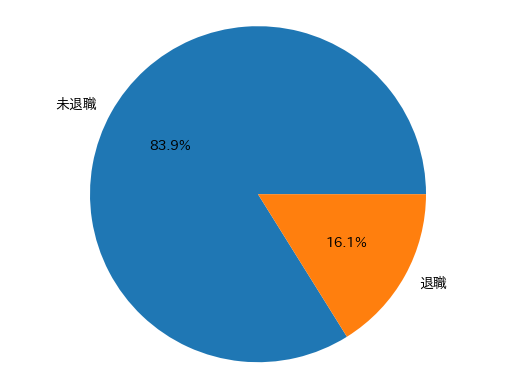

退職：237
未退職：1233


In [15]:
x1 = df['Attrition'].value_counts()

labels = ['未退職', '退職']
values = x1.values.tolist()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

yes = (df['Attrition'] == 1).sum()
no = (df['Attrition'] == 0).sum()
print(f'退職：{yes}')
print(f'未退職：{no}')

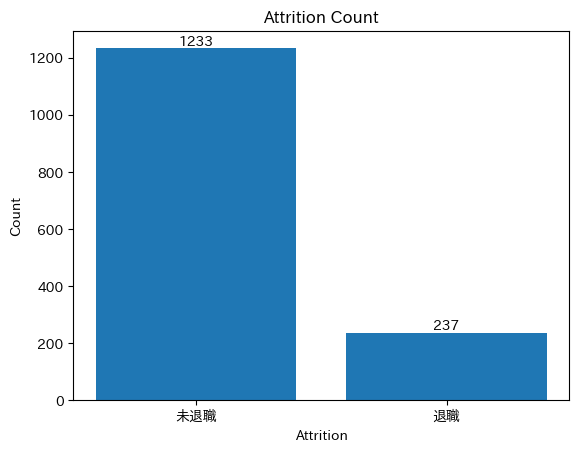

退職：237
未退職：1233


In [16]:
# retirement_rate = df.groupby('Attrition')
# plt.bar(retirement_rate.index, retierement_rate.values)
# plt.xlabel('retirement')
# plt.ylabel('Attrition')
# plt.title('retirement_rate')
# plt.show()




x1 = df['Attrition'].value_counts()

labels = ['未退職', '退職']
values = x1.values.tolist()

# 棒グラフを作成
plt.bar(labels, values)

# グラフに値を表示
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')
plt.show()

yes = (df['Attrition'] == 1).sum()
no = (df['Attrition'] == 0).sum()
print(f'退職：{yes}')
print(f'未退職：{no}')


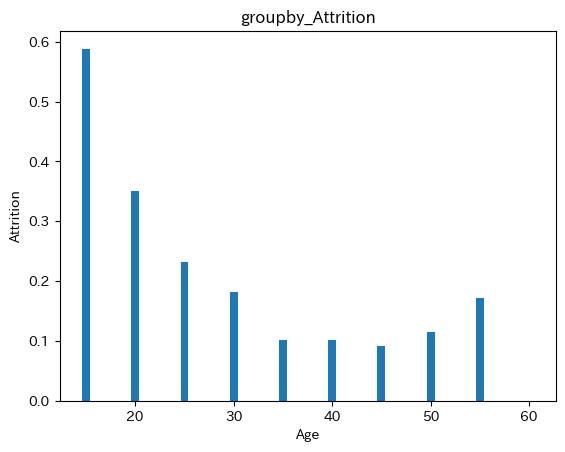

Age_Group
15    0.588235
20    0.350000
25    0.231441
30    0.181538
35    0.101010
40    0.100962
45    0.092199
50    0.115385
55    0.171875
60    0.000000
Name: Attrition, dtype: float64


In [17]:
#年齢ごとの退職率の比較

df['Age_Group'] = (df['Age'] // 5) * 5
age_groups = df.groupby('Age_Group')
retirement_rate = age_groups['Attrition'].mean()
plt.bar(retirement_rate.index, retirement_rate.values)
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.title('groupby_Attrition')
plt.show()

print(retirement_rate)

237


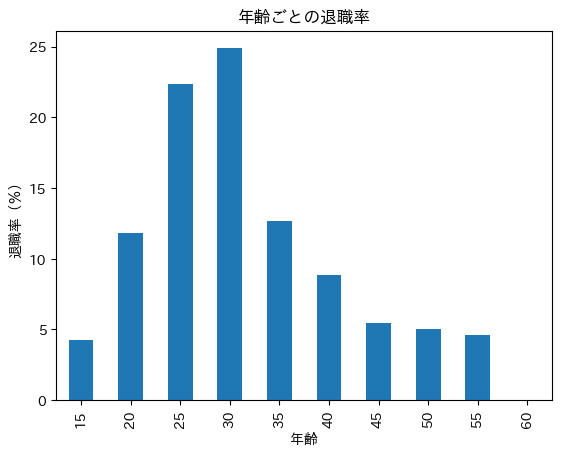

In [65]:
#年齢ごとの退職率
df['Age'] = (df['Age'] // 5) * 5
age = df.groupby('Age')
# age_retirement_counts = age[['Attrition']== 1].value_counts().sort_index()
age_retirement_counts = age['Attrition'].sum()
total_employees = (df['Attrition'] == 1).sum()
print(total_employees)

age_retirement_rates = (age_retirement_counts / total_employees) * 100

# 棒グラフを描画
age_retirement_rates.plot(kind='bar', stacked=True)

plt.xlabel("年齢")
plt.ylabel("退職率（％）")
plt.title("年齢ごとの退職率")
plt.show()

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

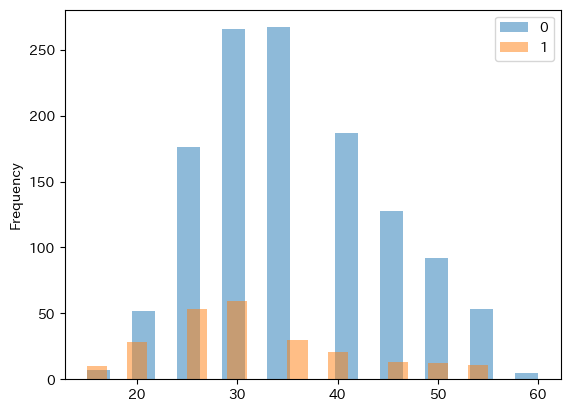

In [68]:
df.groupby('Attrition')['Age'].plot.hist(bins=20, alpha=0.5, legend=True)

237


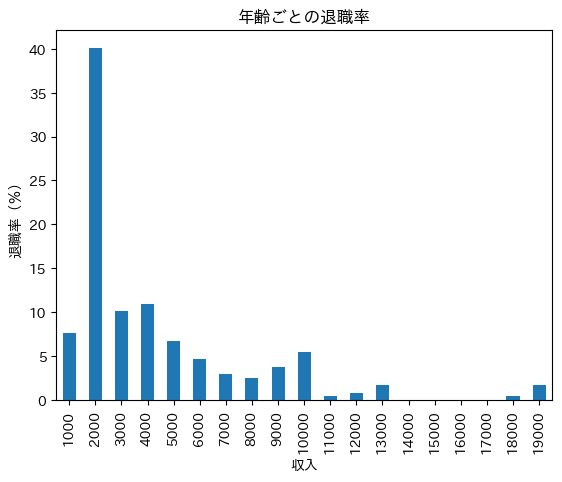

In [67]:

df['MonthlyIncome'] = (df['MonthlyIncome'] // 1000) * 1000
MI = df.groupby('MonthlyIncome')
# age_retirement_counts = age[['Attrition']== 1].value_counts().sort_index()
MI_retirement_counts = MI['Attrition'].sum()
total_employees = (df['Attrition'] == 1).sum()
print(total_employees)

MI_retirement_rates = (MI_retirement_counts / total_employees) * 100


# 棒グラフを描画
MI_retirement_rates.plot(kind='bar', stacked=True)

plt.xlabel("収入")
plt.ylabel("退職率（％）")
plt.title("年齢ごとの退職率")
plt.show()

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: MonthlyIncome, dtype: object

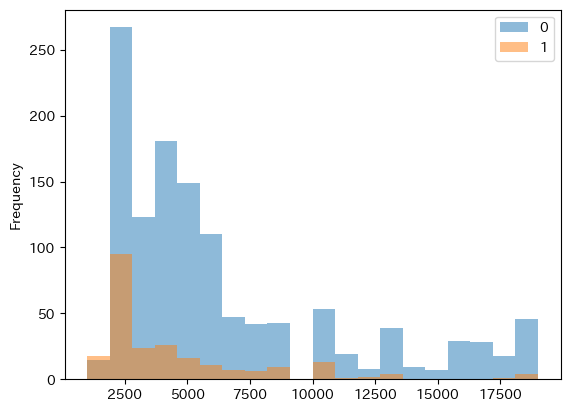

In [63]:
df.groupby('Attrition')['MonthlyIncome'].plot.hist(bins=20, alpha=0.5, legend=True)

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Satisfaction, dtype: object

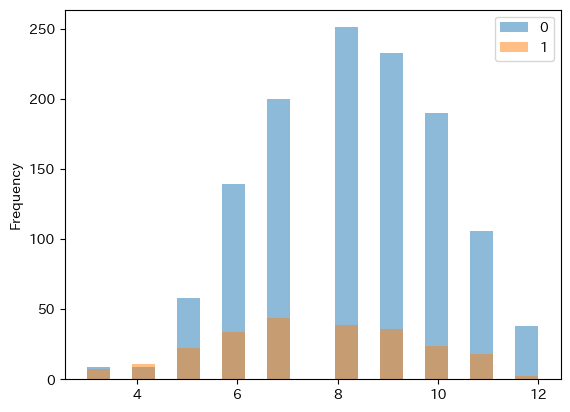

In [77]:
df.groupby('Attrition')['Satisfaction'].plot.hist(bins=20, alpha=0.5, legend=True)

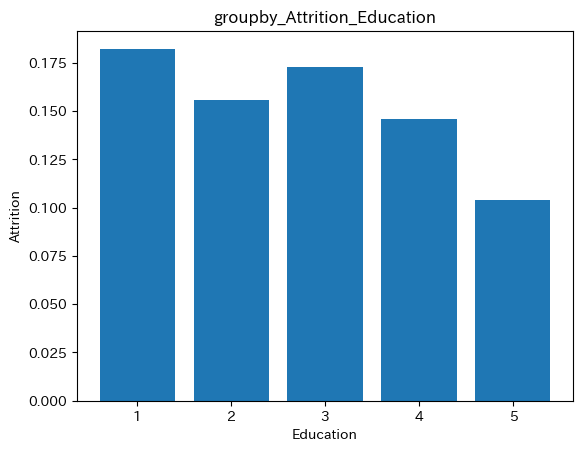

In [19]:
edu_group = df.groupby('Education')
retirement_rate2 = edu_group['Attrition'].mean()
plt.bar(retirement_rate2.index, retirement_rate2.values)
plt.xlabel('Education')
plt.ylabel('Attrition')
plt.title('groupby_Attrition_Education')
plt.show()

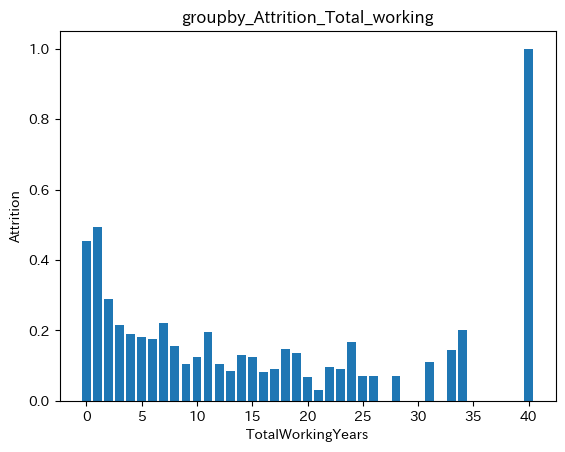

In [20]:
#働いている期間の離職割合

total_working = df.groupby('TotalWorkingYears')
retirement_rate3 = total_working['Attrition'].mean()
plt.bar(retirement_rate3.index, retirement_rate3.values)
plt.xlabel('TotalWorkingYears')
plt.ylabel('Attrition')
plt.title('groupby_Attrition_Total_working')
plt.show()

TotalWorkingYears(働いている期間)が40年は定年退職

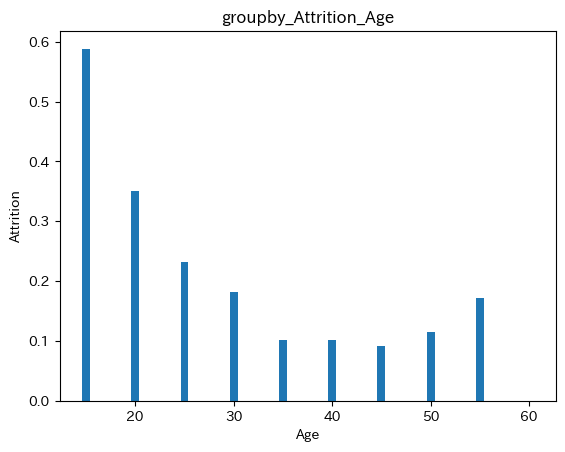

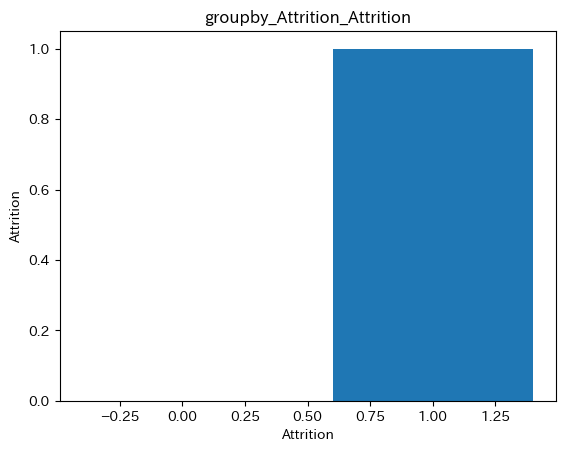

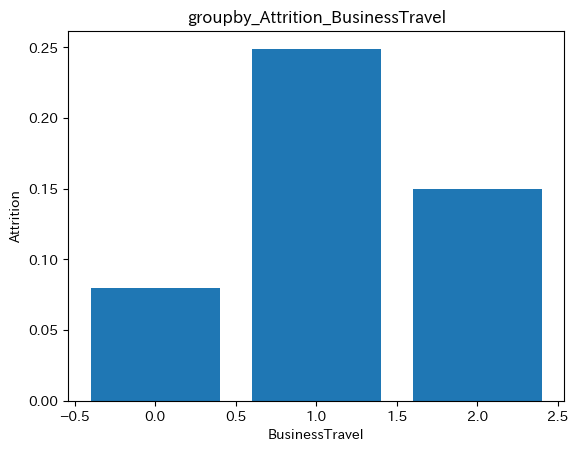

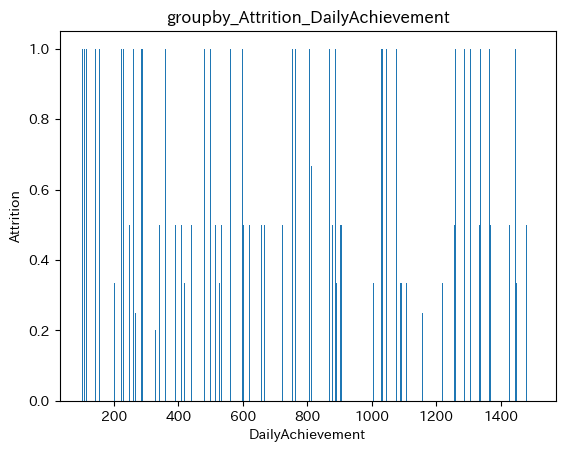

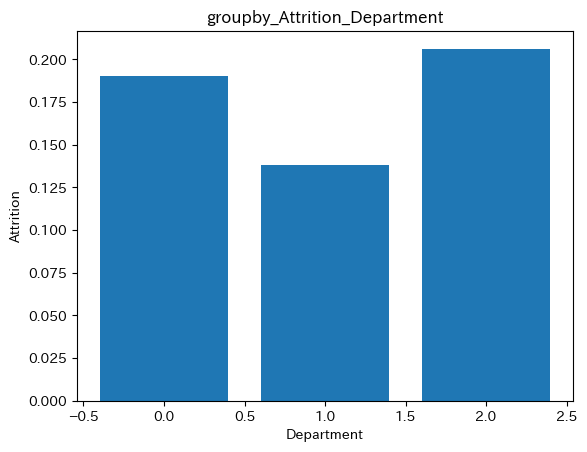

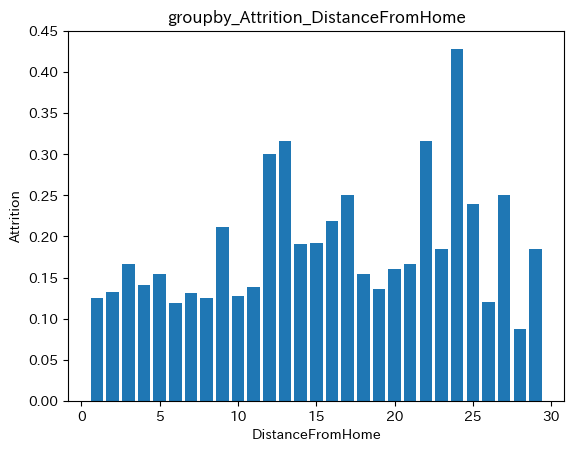

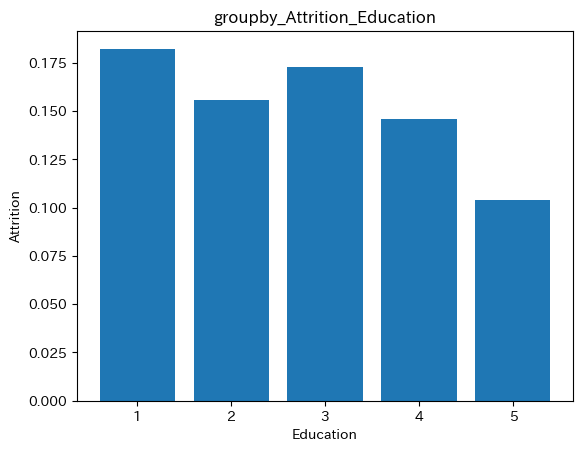

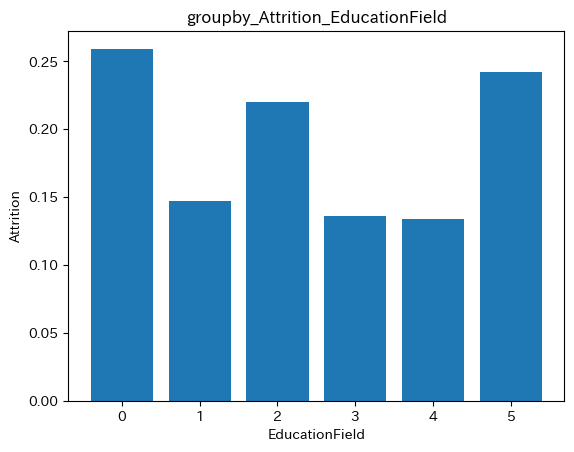

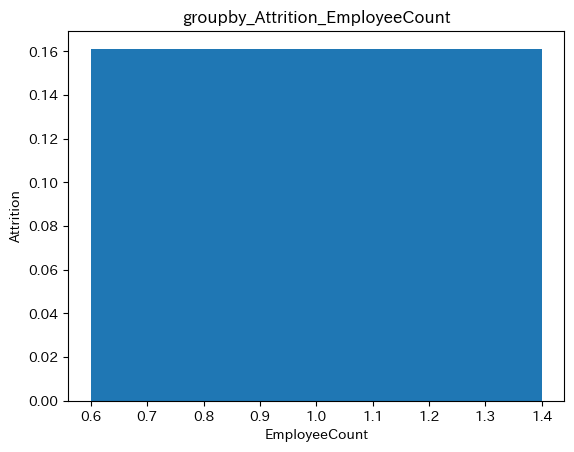

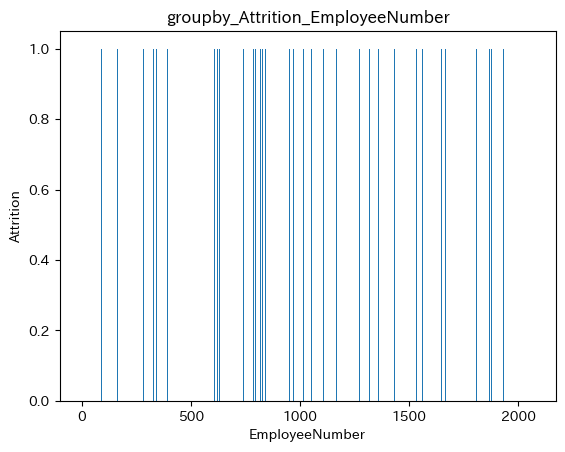

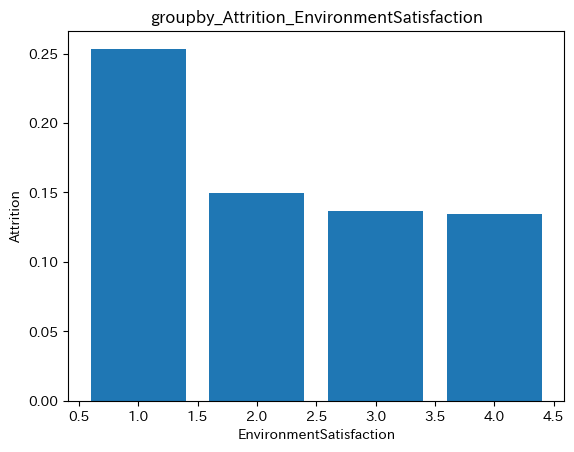

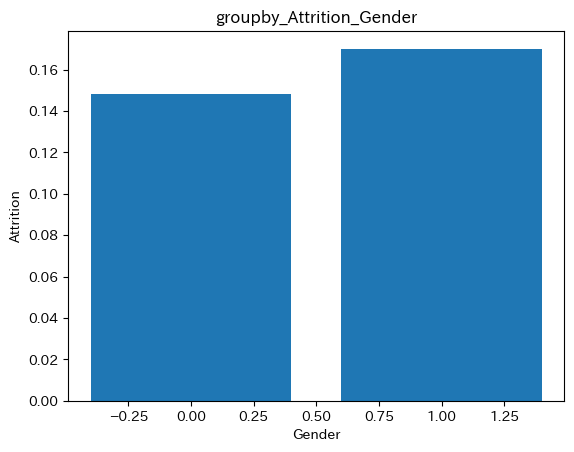

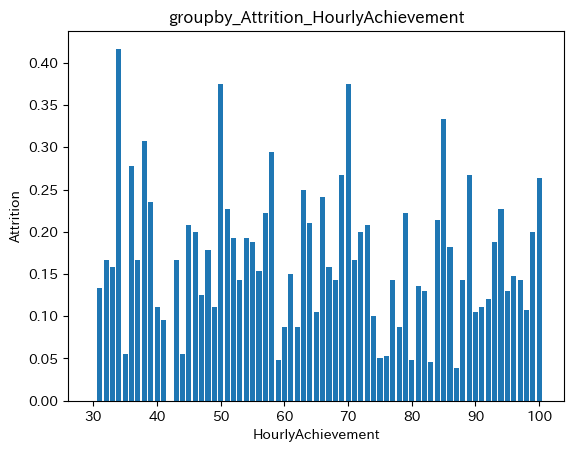

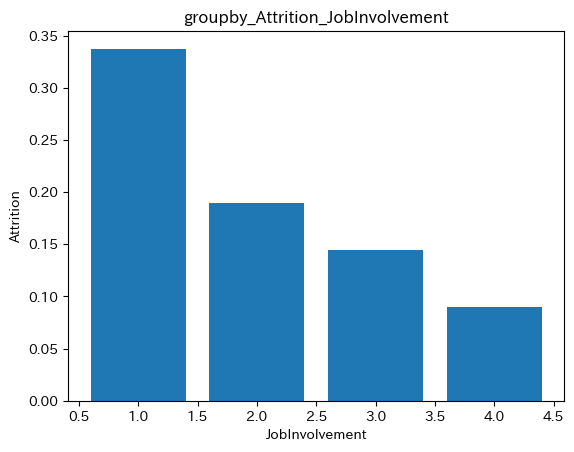

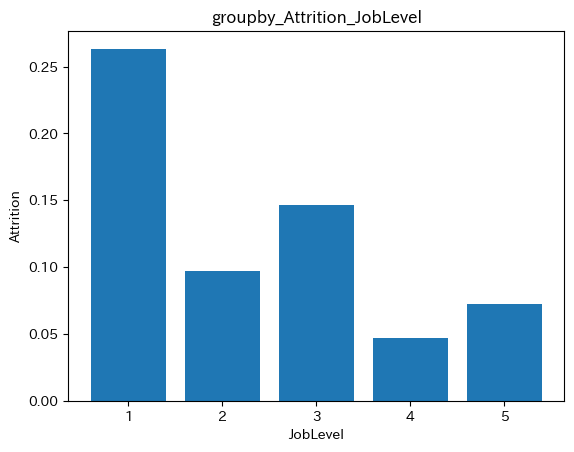

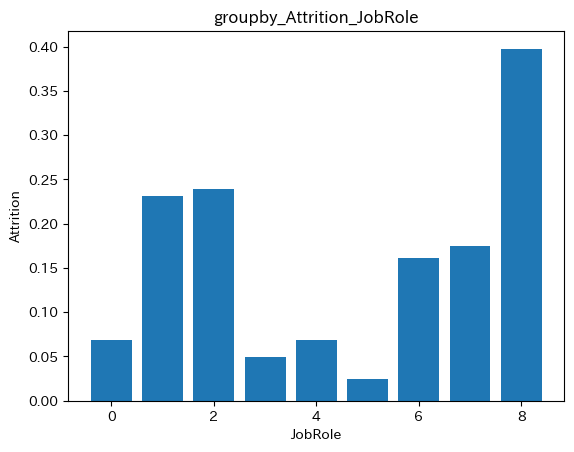

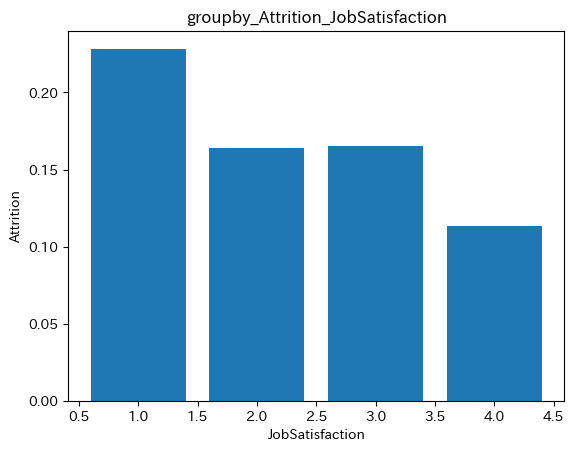

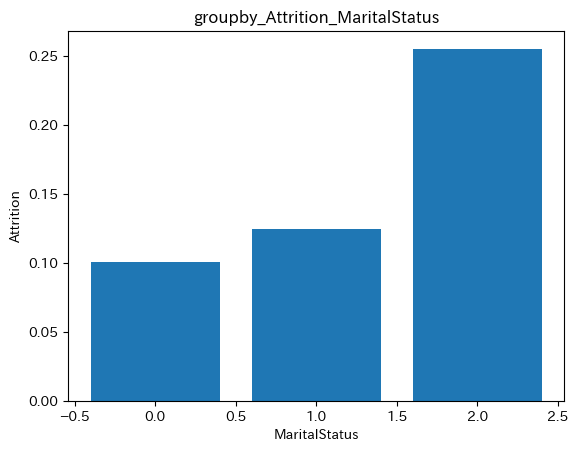

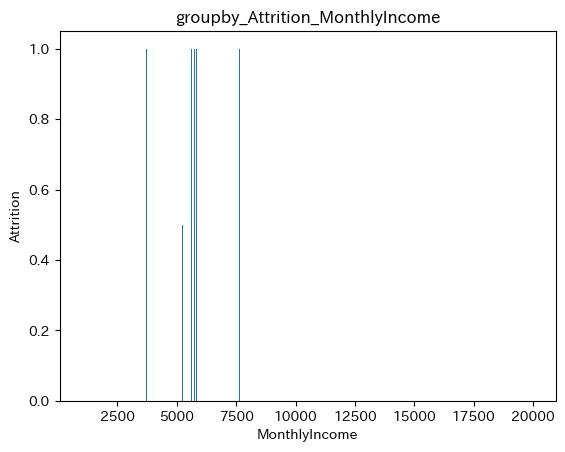

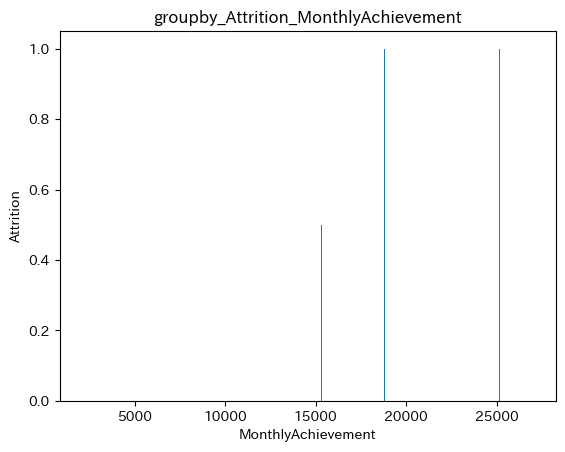

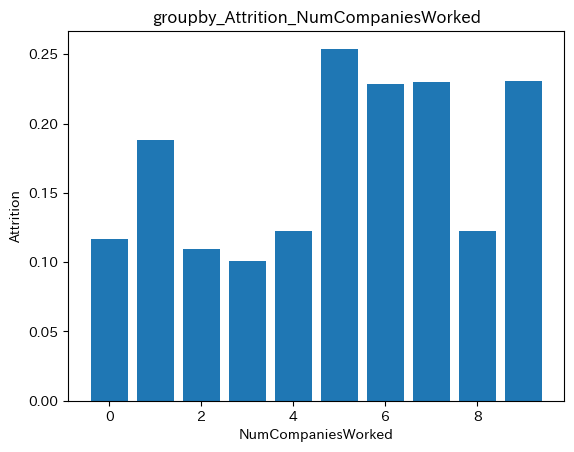

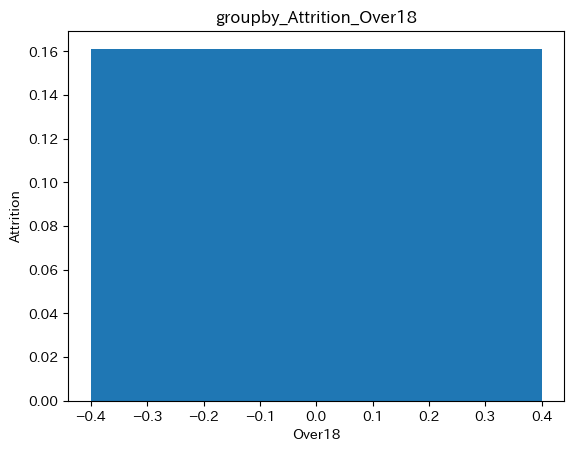

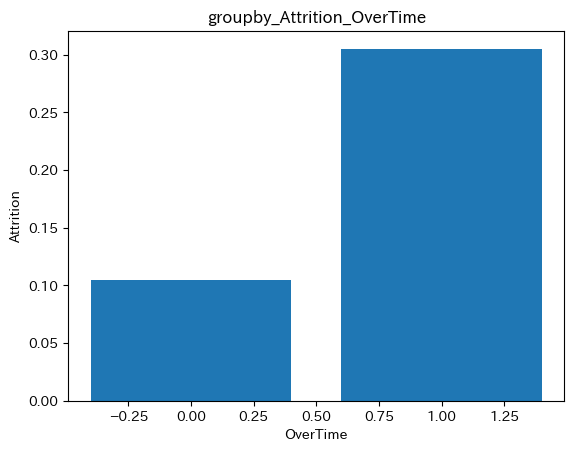

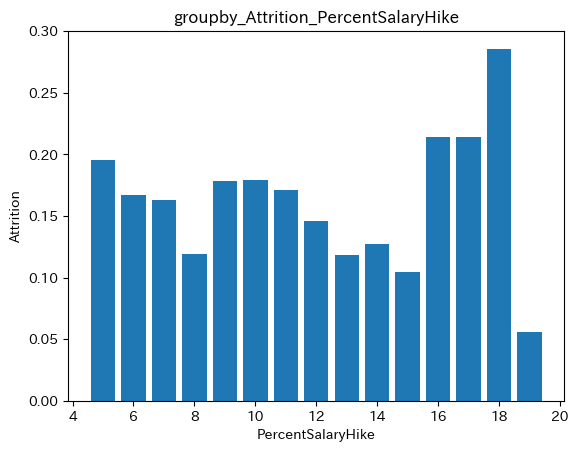

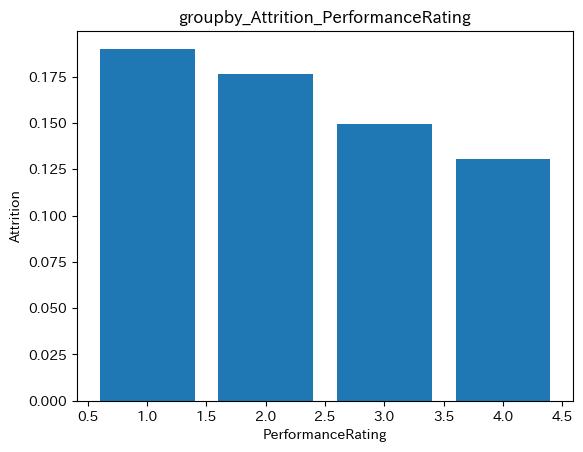

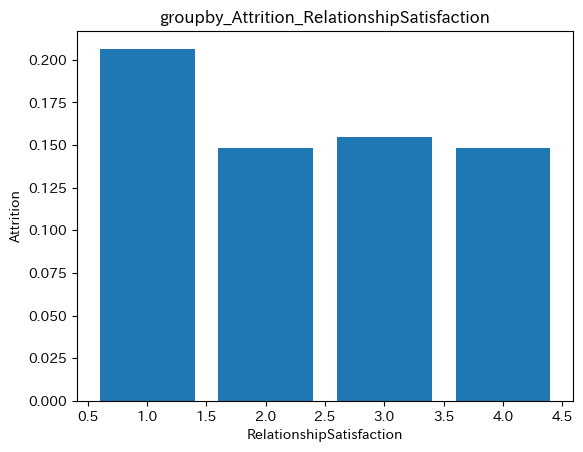

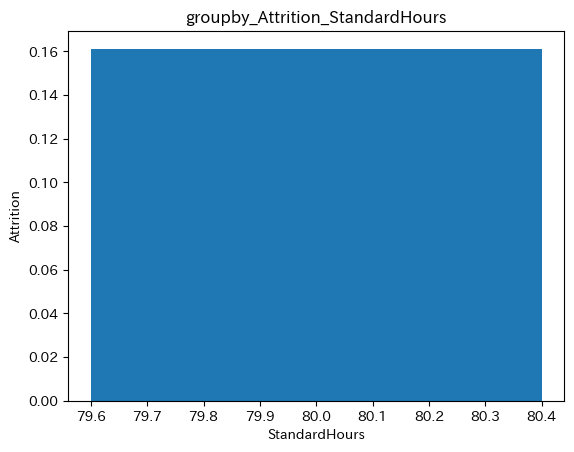

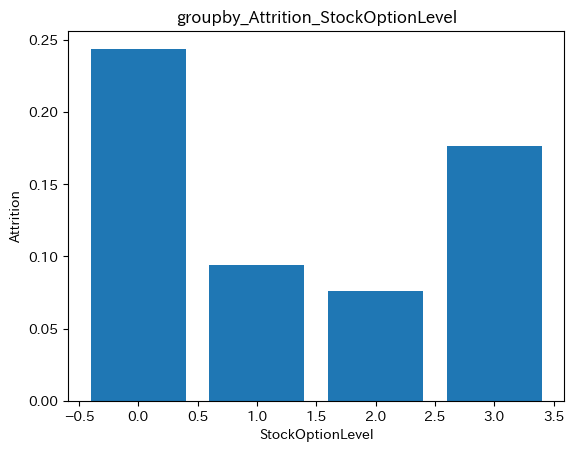

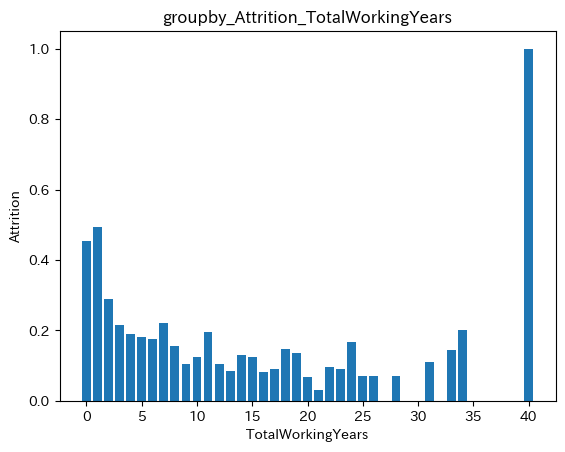

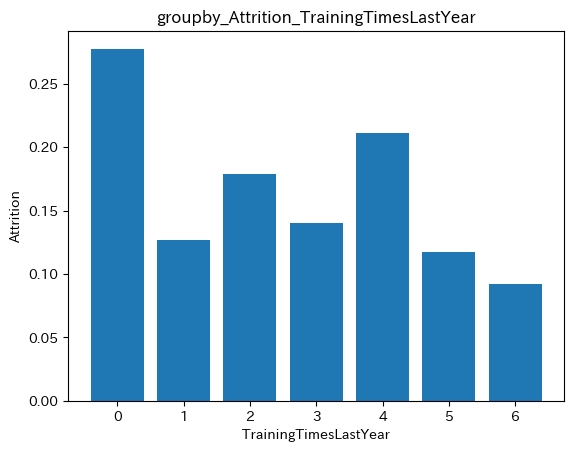

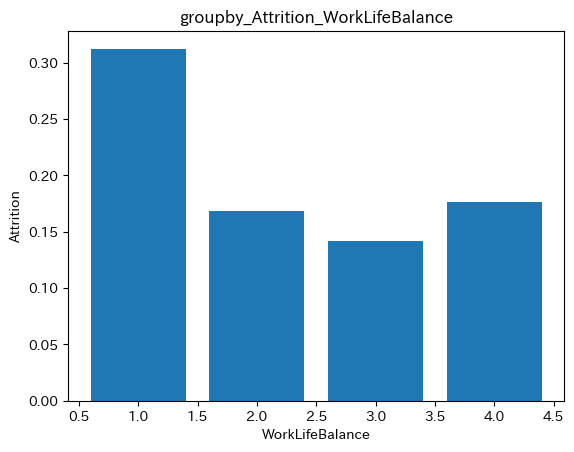

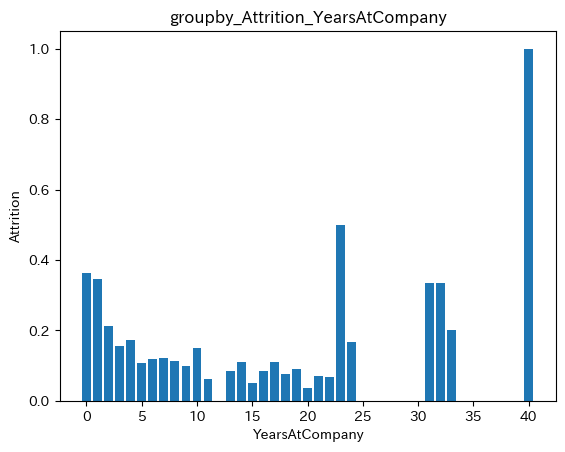

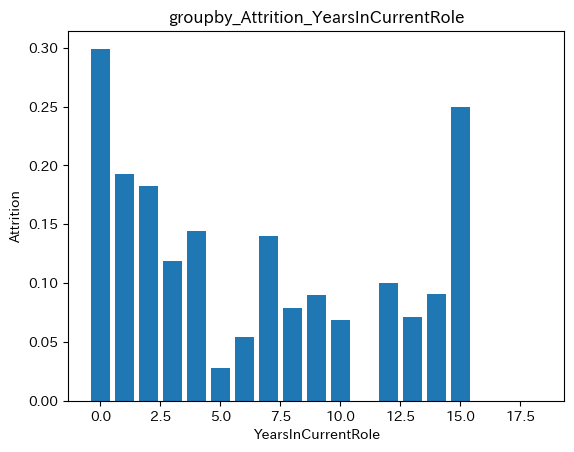

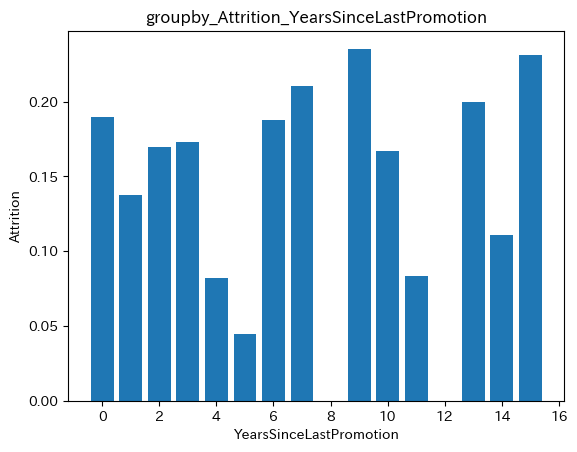

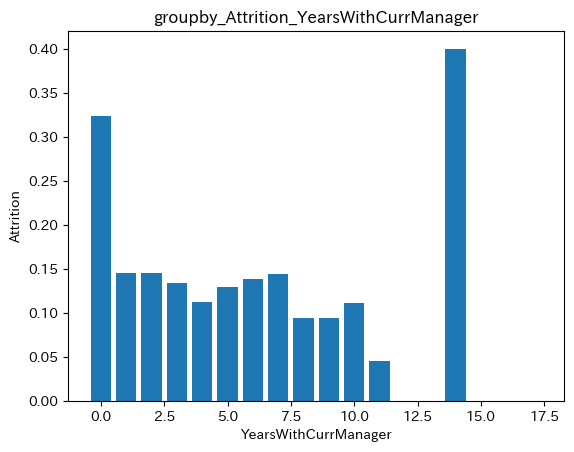

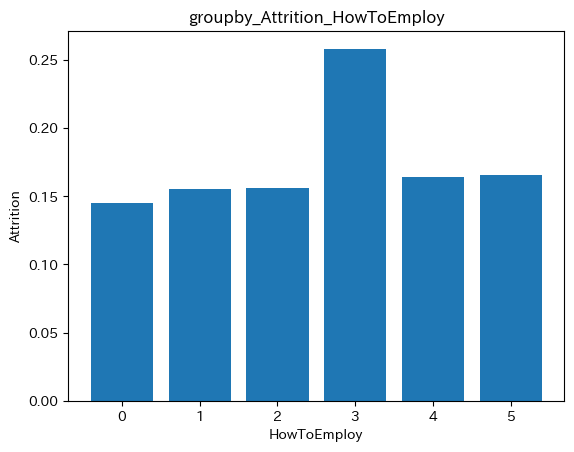

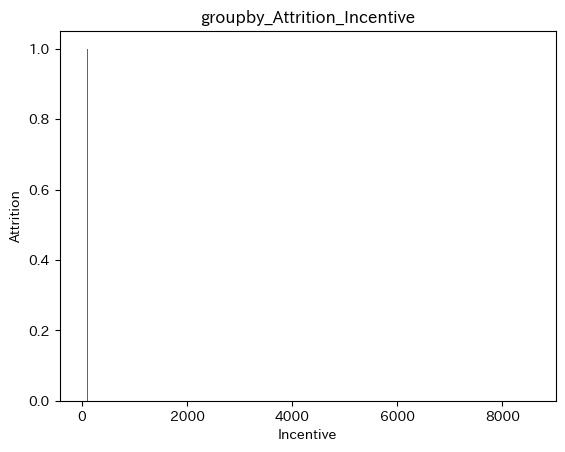

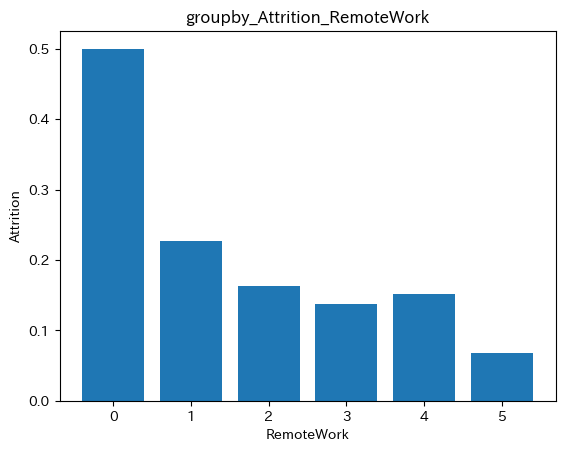

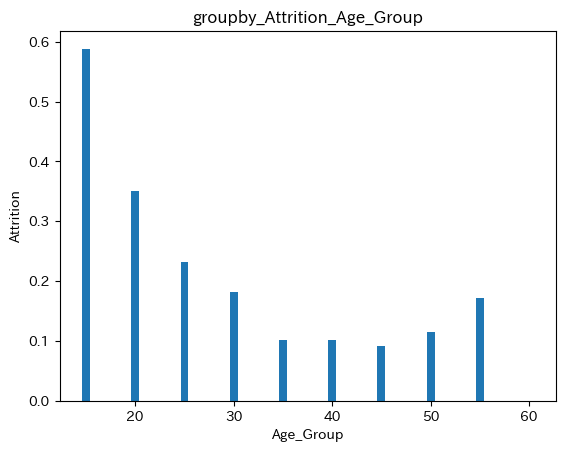

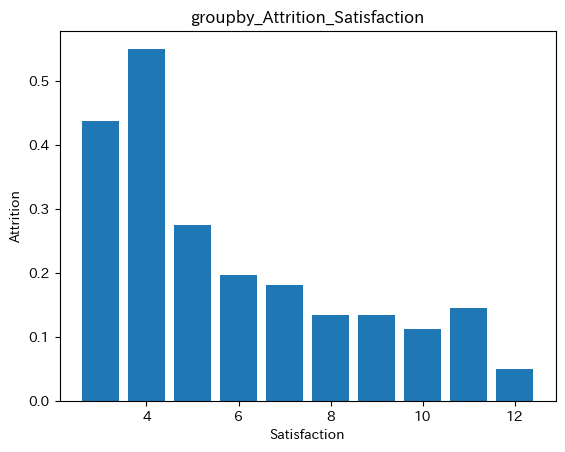

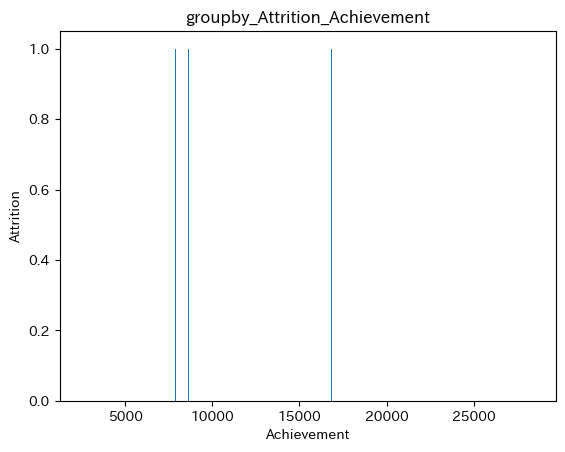

In [45]:
all_columns = df.columns

for col in all_columns:
    group_col = df.groupby(col)
    retirement_rate = group_col['Attrition'].mean()
    plt.bar(retirement_rate.index, retirement_rate.values)
    plt.xlabel(col)
    plt.ylabel('Attrition')
    plt.title('groupby_Attrition_' + col)
    plt.show()

In [22]:
df['Satisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']
df['Achievement'] = df['DailyAchievement'] + df['HourlyAchievement'] + df['MonthlyAchievement']
drop_columns = ['EmployeeNumber', 'Over18', 'StandardHours', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'DailyAchievement', 'HourlyAchievement', 'MonthlyAchievement']

df2 = df.drop(drop_columns,axis=1)
print(df2.shape)

y = df2['Attrition']
x = df2.drop('Attrition', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27)
df2.columns

(1470, 32)


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'HowToEmploy', 'Incentive', 'RemoteWork', 'Age_Group', 'Satisfaction',
       'Achievement'],
      dtype='object')

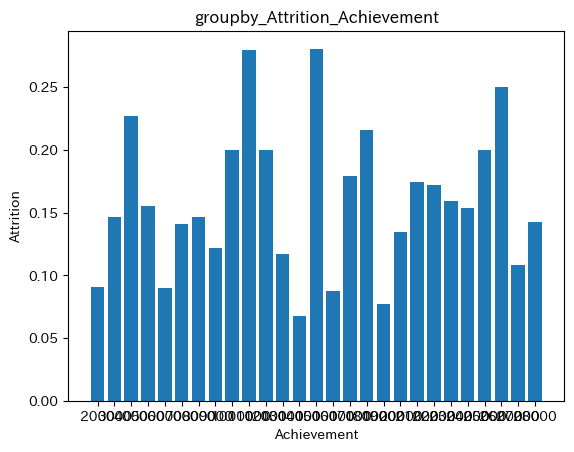

In [75]:
df2['Achievement'] = (df2['Achievement'] // 1000) * 1000
ach = df2.groupby('Achievement')
retirement_rate = ach['Attrition'].mean()
plt.bar(range(len(retirement_rate)), retirement_rate.values)  # バーの位置を整数値で指定
plt.xticks(range(len(retirement_rate)), retirement_rate.index)  # X軸にラベルを設定
plt.xlabel('Achievement')
plt.ylabel('Attrition')
plt.title('groupby_Attrition_Achievement')
plt.show()

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Achievement, dtype: object

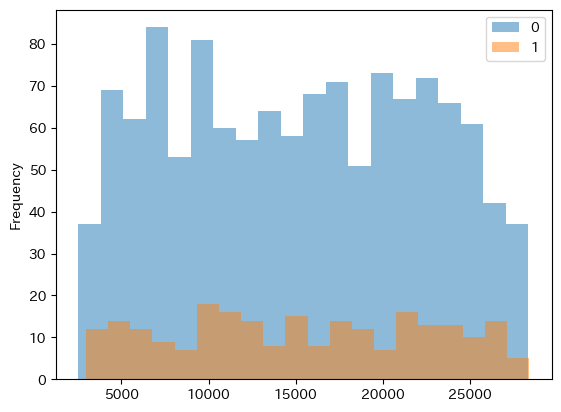

In [76]:
df.groupby('Attrition')['Achievement'].plot.hist(bins=20, alpha=0.5, legend=True)

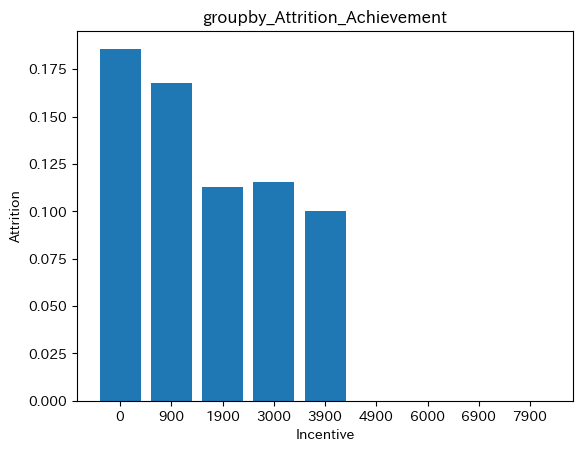

In [87]:
#df2['Incentive'] = (df2['Incentive'] // 10) * 10
ach = df2.groupby('Incentive')
retirement_rate = ach['Attrition'].mean()
plt.bar(range(len(retirement_rate)), retirement_rate.values)  # バーの位置を整数値で指定
plt.xticks(range(len(retirement_rate)), retirement_rate.index)  # X軸にラベルを設定
plt.xlabel('Incentive')
plt.ylabel('Attrition')
plt.title('groupby_Attrition_Achievement')
plt.show()

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Incentive, dtype: object

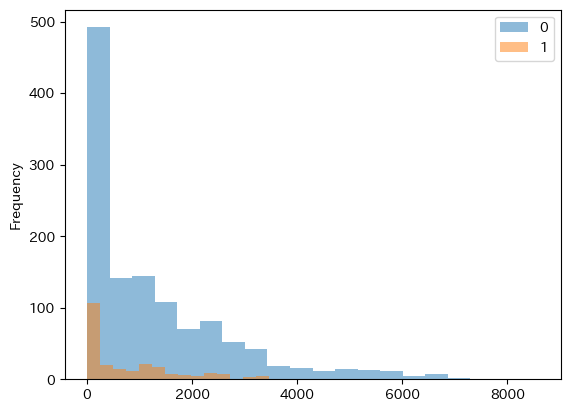

In [82]:
df.groupby('Attrition')['Incentive'].plot.hist(bins=20, alpha=0.5, legend=True)

Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: DistanceFromHome, dtype: object

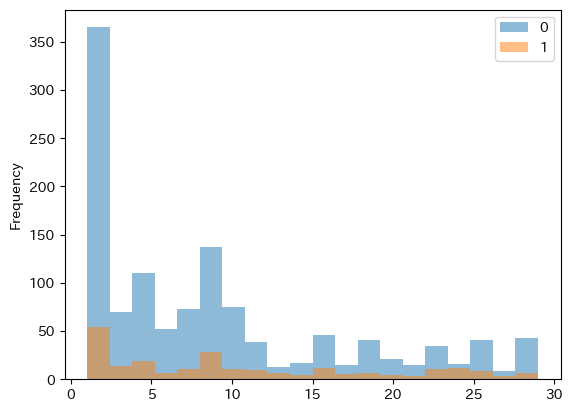

In [88]:
df.groupby('Attrition')['DistanceFromHome'].plot.hist(bins=20, alpha=0.5, legend=True)

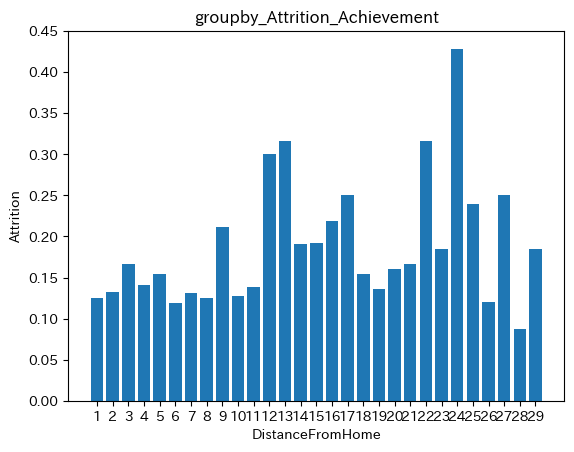

In [89]:
ach = df2.groupby('DistanceFromHome')
retirement_rate = ach['Attrition'].mean()
plt.bar(range(len(retirement_rate)), retirement_rate.values)  # バーの位置を整数値で指定
plt.xticks(range(len(retirement_rate)), retirement_rate.index)  # X軸にラベルを設定
plt.xlabel('DistanceFromHome')
plt.ylabel('Attrition')
plt.title('groupby_Attrition_Achievement')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV



# #グリッドサーチによるハイパラチューニング
# parameters = {
#     'n_estimators': [10, 20, 30, 50, 100, 300],     # 用意する決定木モデルの数
#     'max_features': ('sqrt', 'log2','auto', None),  # ランダムに指定する特徴量の数
#     'max_depth':    (10, 20, 30, 40, 50, None),     # 決定木のノード深さの制限値
#     'min_samples_split': [2, 5, 10]                 # ノードを分割するために必要なサンプル数
# }

# clf = RandomForestClassifier()

# gridsearch = GridSearchCV(estimator = clf,        # モデル
#                           param_grid = parameters,  # チューニングするハイパーパラメータ
#                           scoring = "accuracy"      # スコアリング
#                          )

# # 演算実行
# gridsearch.fit(x_train, y_train)

# # グリッドサーチの結果から得られた最適なパラメータ候補を確認
# print('Best params: {}'.format(gridsearch.best_params_))
# print('Best Score: {}'.format(gridsearch.best_score_))

In [24]:

clf = RandomForestClassifier(max_depth= 50, max_features= None, min_samples_split= 10, n_estimators= 20)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features=None, min_samples_split=10,
                       n_estimators=20)

In [25]:
print('正解率(train):{:.3f}'.format(clf.score(x_train, y_train)))
print('正解率(test):{:.3f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import roc_auc_score
y_pred = clf.predict_proba(x_test)[:, 1]  # 予測確率を取得

# AUCスコアを計算
auc_score = roc_auc_score(y_test, y_pred)
print("AUCスコア:", auc_score)

正解率(train):0.961
正解率(test):0.882
AUCスコア: 0.8390003400204012


1   MaritalStatus   0.11657126551840409
2   StockOptionLevel   0.08598735171507271
3   NumCompaniesWorked   0.08296011434284047
4   Department   0.07168862436866626
5   Age_Group   0.07005031321803441
6   Satisfaction   0.04886740683292656
7   Incentive   0.04863500619606016
8   HowToEmploy   0.03901532572269835
9   MonthlyIncome   0.03857156515569526
10   WorkLifeBalance   0.03691059681614332
11   OverTime   0.03261978478959322
12   JobLevel   0.029885075776955573
13   TotalWorkingYears   0.02969157209443507
14   Gender   0.026680329028712774
15   Education   0.02401242705310514
16   YearsSinceLastPromotion   0.023002165194235973
17   JobRole   0.0220283990422681
18   YearsInCurrentRole   0.02175093048784008
19   TrainingTimesLastYear   0.020777871555838257
20   Age   0.01970112169578923
21   PerformanceRating   0.01966492128184855
22   RemoteWork   0.017200082295975444
23   YearsWithCurrManager   0.016378128327337003
24   JobInvolvement   0.012782178027561358
25   Attrition   0.01130

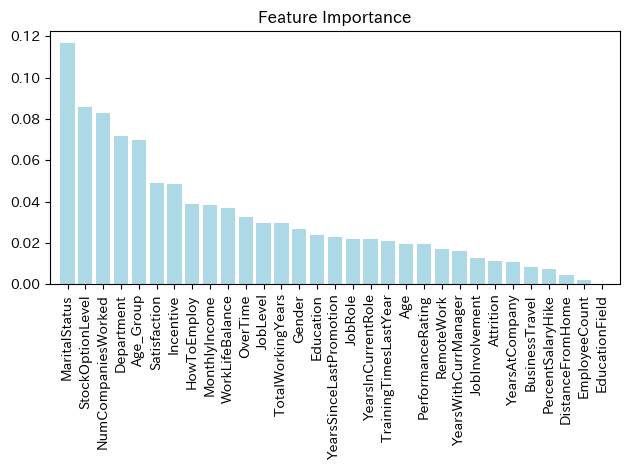

In [26]:
#特徴量の重要度
feature = clf.feature_importances_

#特徴量の名前
label = df2.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:1306: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


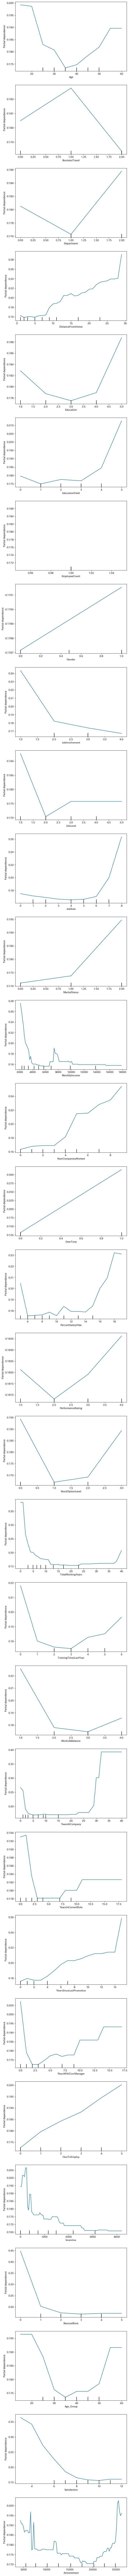

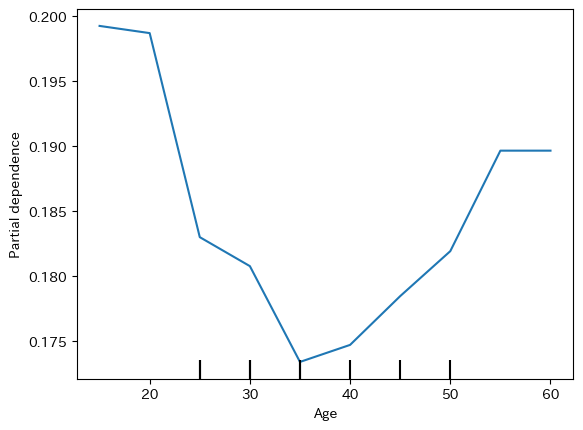

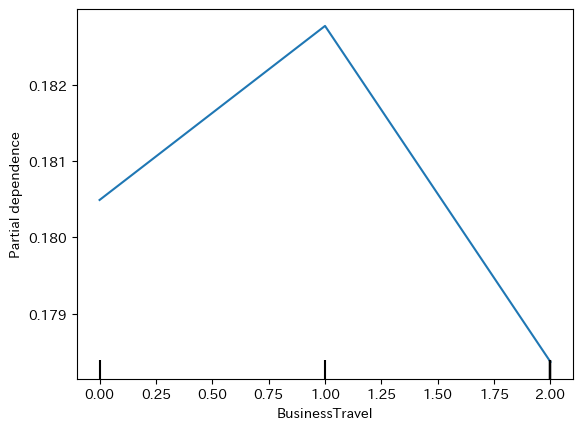

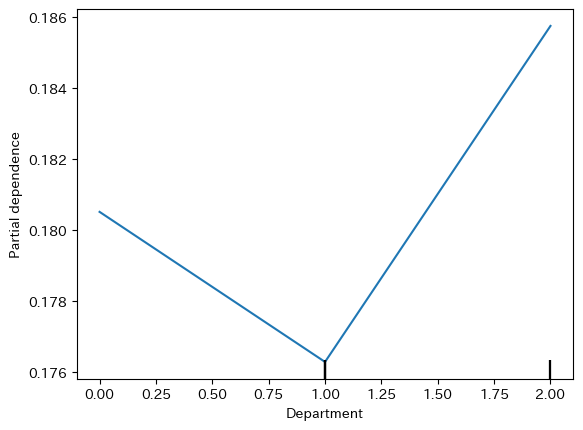

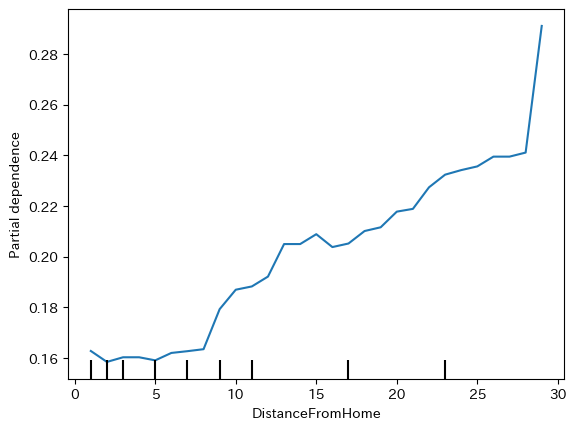

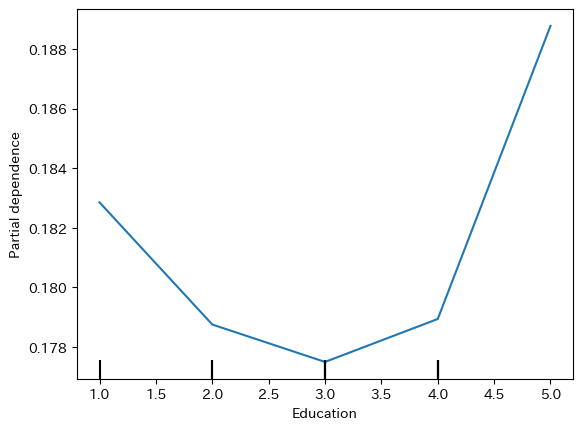

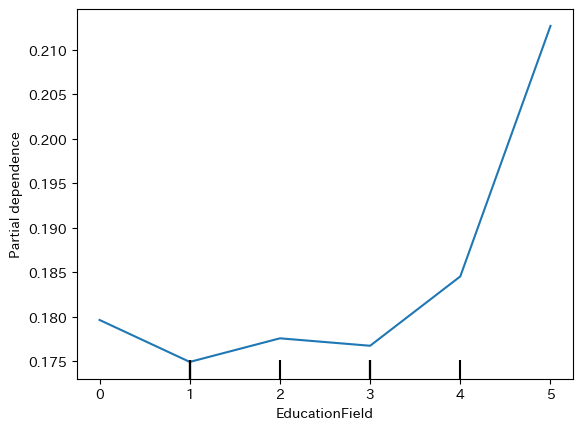

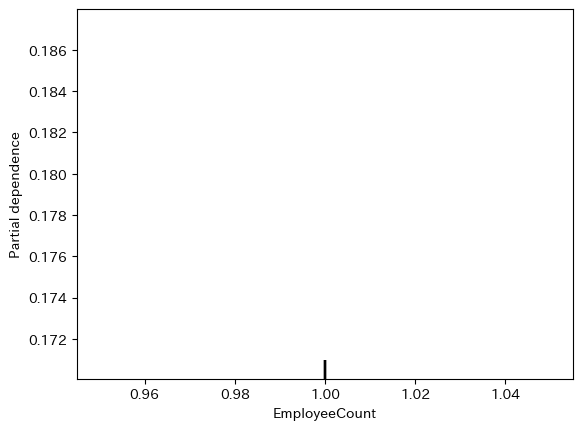

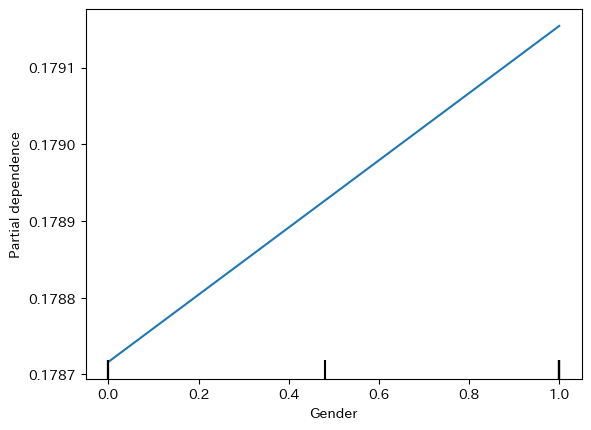

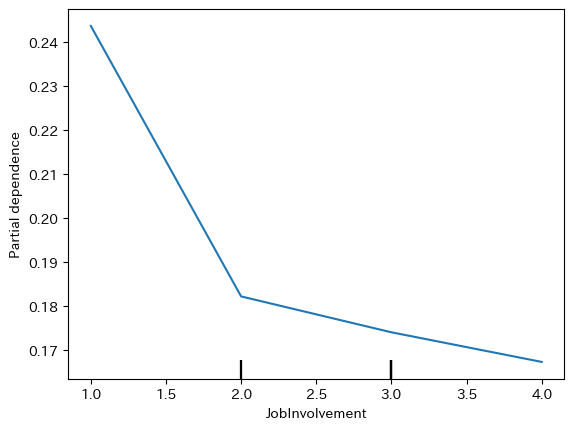

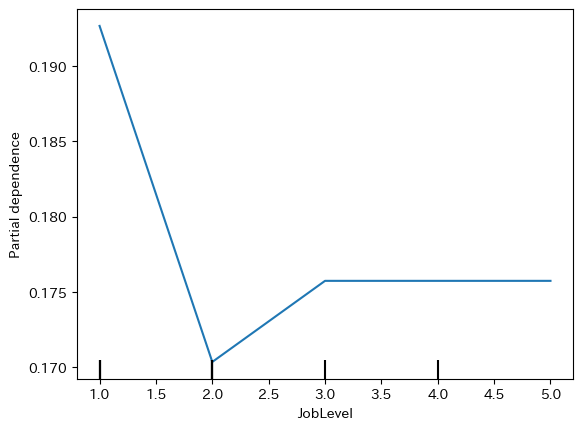

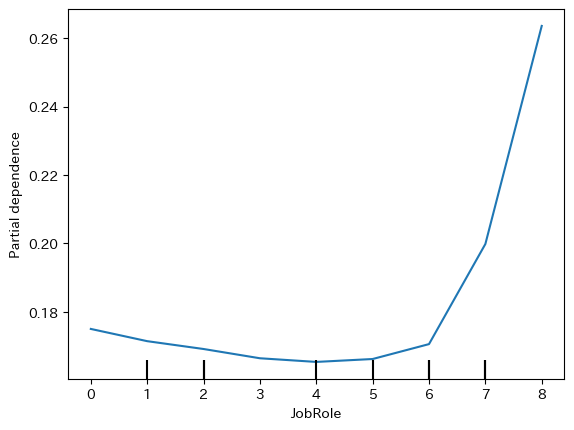

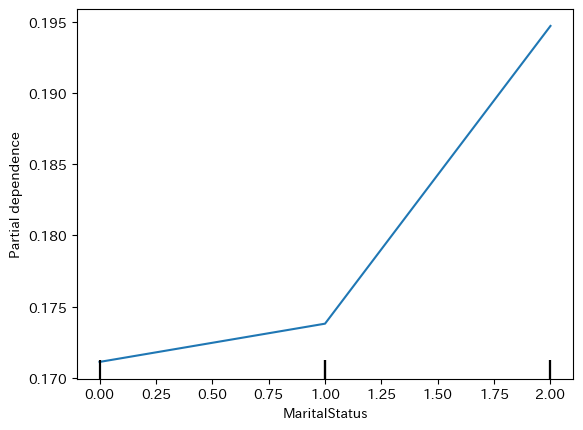

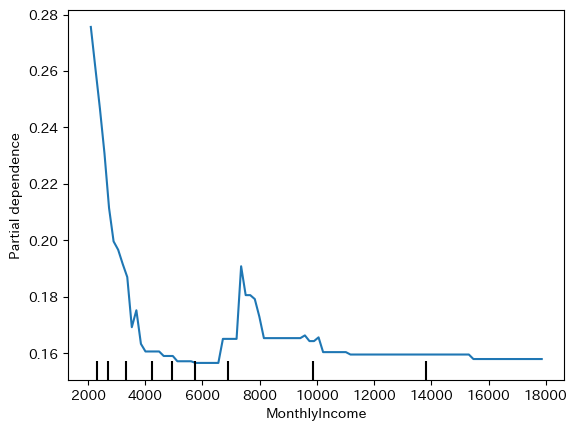

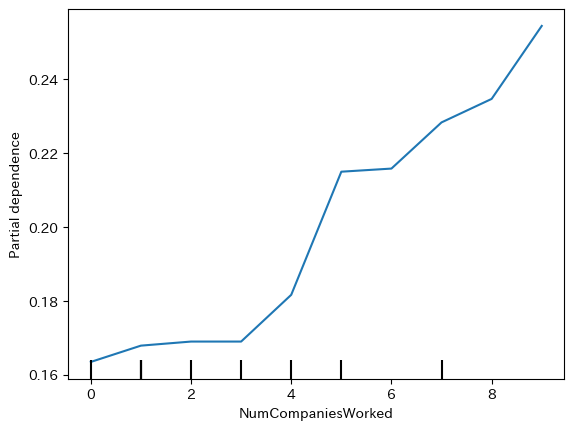

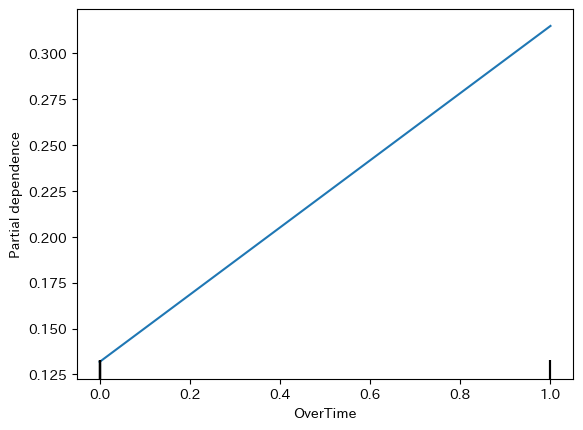

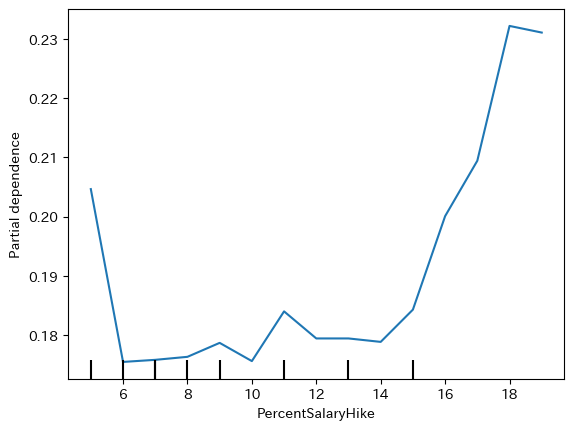

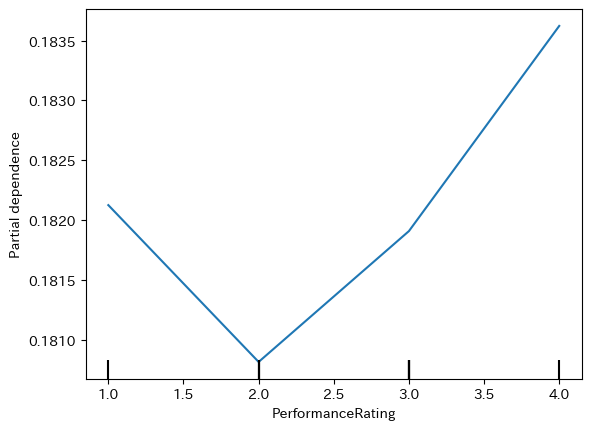

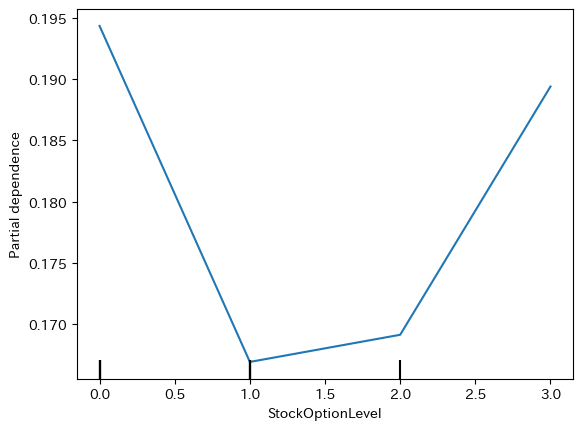

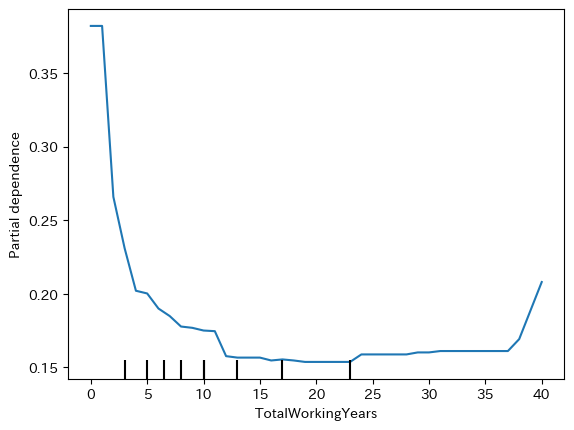

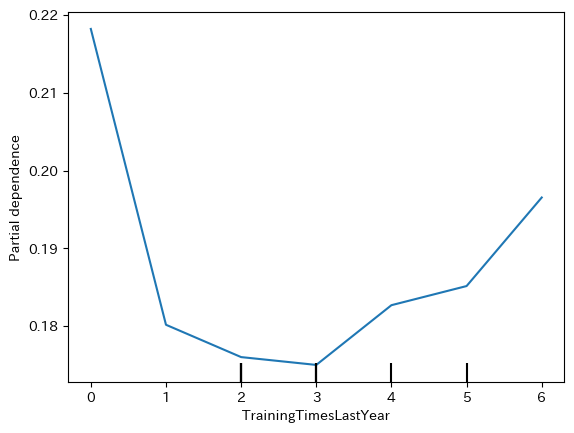

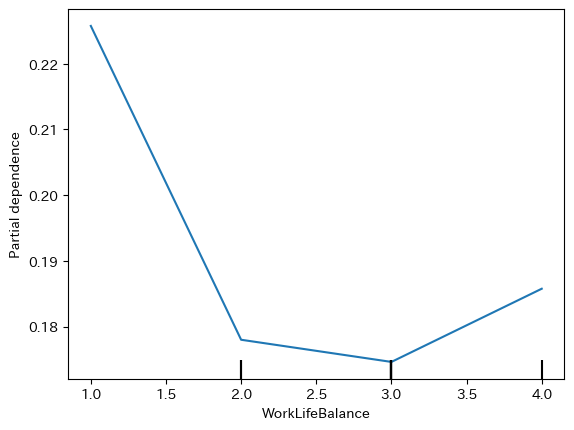

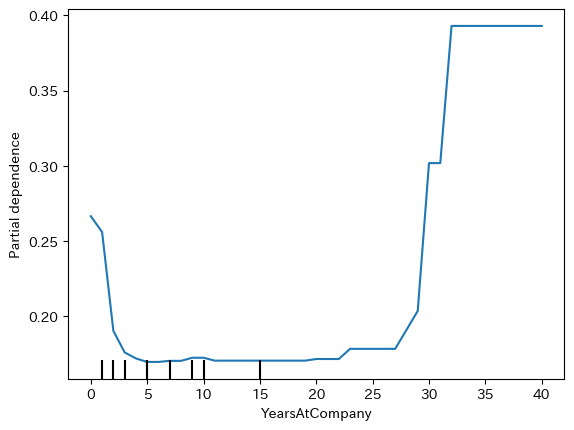

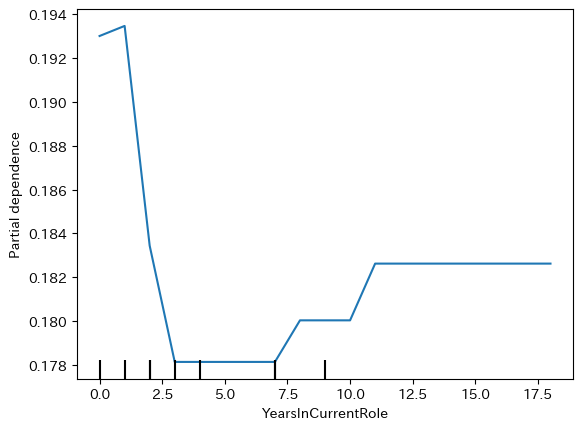

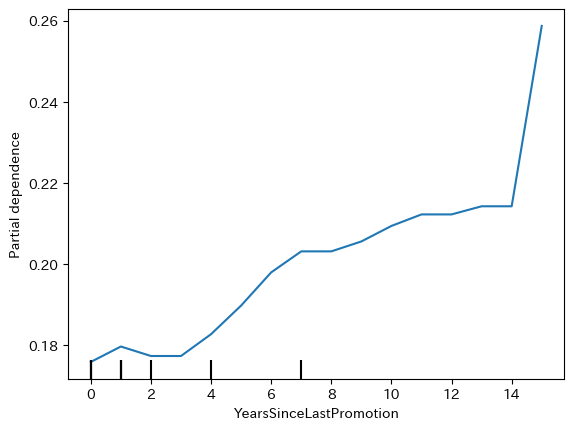

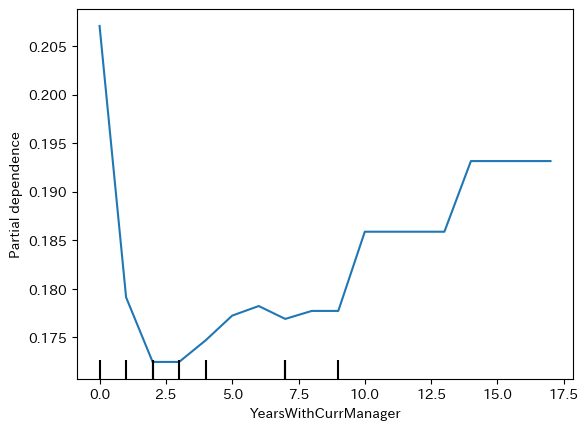

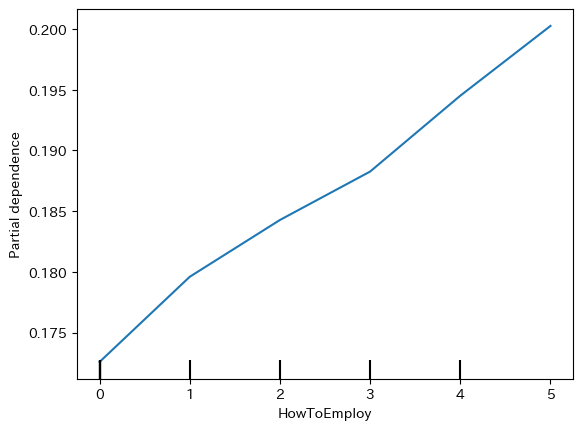

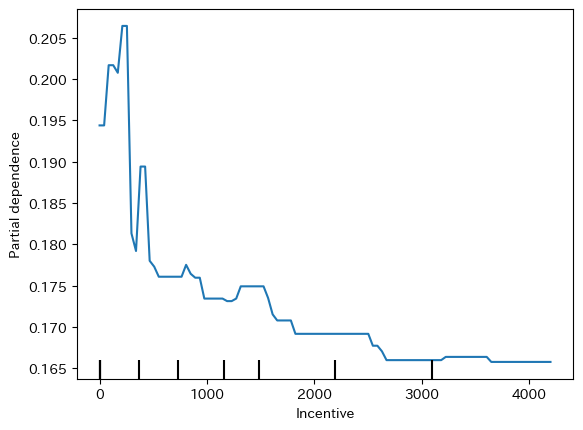

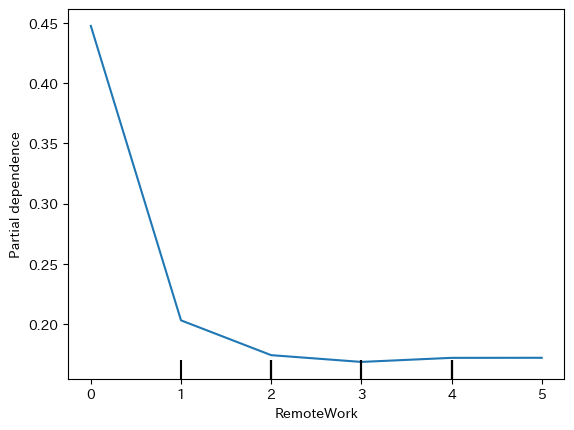

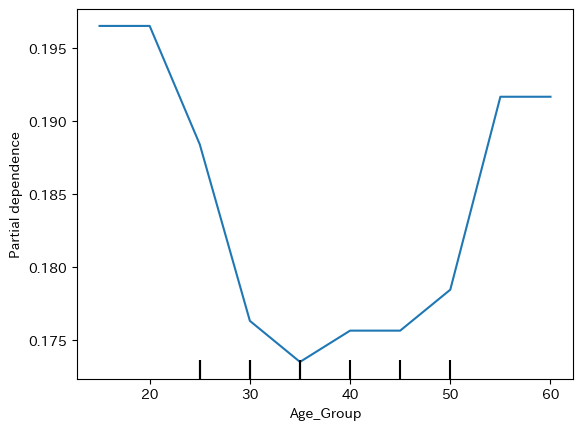

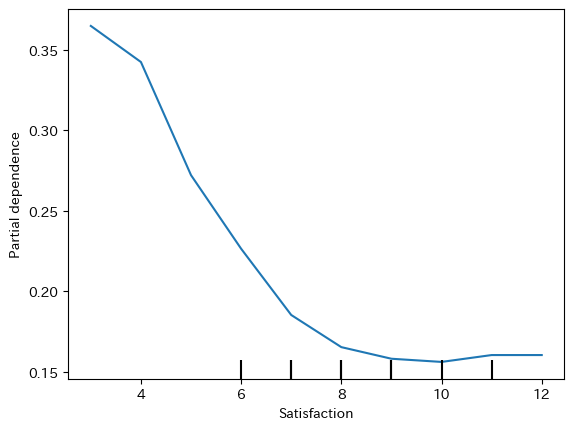

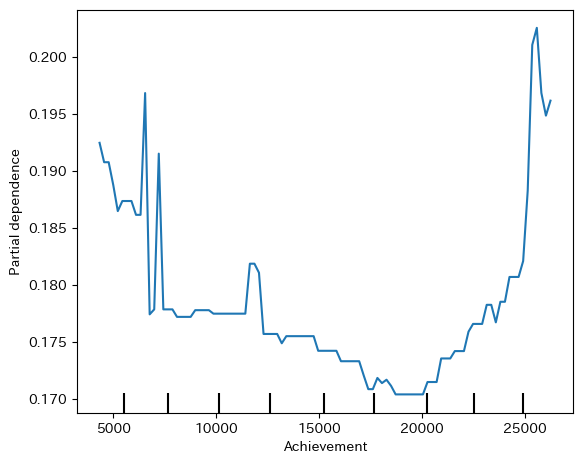

In [28]:
# 部分依存プロットを表示する特徴量のインデックスを選択
feature_indices = x.columns  # 全ての特徴量を選択

# Subplotの行数と列数を指定
num_rows = len(feature_indices)
num_cols = 1

# サブプロットを作成
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 6*num_rows))

# PartialDependenceDisplayを使用して部分依存プロットを表示
for i, feature_idx in enumerate(feature_indices):
    display = PartialDependenceDisplay.from_estimator(clf, x, features=[feature_idx])
    display.plot(ax=axs[i])
    #axs[i].set_title(f'Partial Dependence Plot: {feature_names[feature_idx]}')

plt.subplots_adjust(top=0.95, hspace=0.5)  # タイトルとサブプロットの間のスペースを調整
plt.show()


In [29]:
# LIghtGBM
import lightgbm as lgb
lgb_ = lgb.LGBMRegressor()

# param_grid = {
#     'learning_rate': [0.05, 0.1, 0.2],
#     'num_leaves': [31, 50, 100],
#     'feature_fraction': [0.8, 0.9, 1.0]
# }

# # グリッドサーチを行う
# grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # 最適なハイパーパラメータを表示
# print("Best parameters found: ", grid_search.best_params_)

# # 最適なハイパーパラメータでモデルを再学習
# best_lgb = grid_search.best_estimator_
# best_lgb.fit(x_train, y_train)
# lgb_.fit(x_train, y_train)

# print('正解率(train):{:.3f}'.format(lgb_.score(x_train, y_train)))
# print('正解率(test):{:.3f}'.format(lgb_.score(x_test, y_test)))

# y_pred = lgb_.predict(x_test)[:, 1]  # 予測確率を取得

# # AUCスコアを計算
# auc_score = roc_auc_score(y_test, y_pred)
# print("AUCスコア:", auc_score)

In [30]:
import xgboost as xgb
xgb_ = xgb.XGBClassifier()
xgb_.fit(x_train, y_train)

# テストデータで予測確率を取得
y_pred_proba = xgb_.predict_proba(x_test)[:, 1]

# AUCスコアを計算
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUCスコア:", auc_score)

print('正解率(train):{:.3f}'.format(xgb_.score(x_train, y_train)))
print('正解率(test):{:.3f}'.format(xgb_.score(x_test, y_test)))

AUCスコア: 0.8675620537232234
正解率(train):1.000
正解率(test):0.897


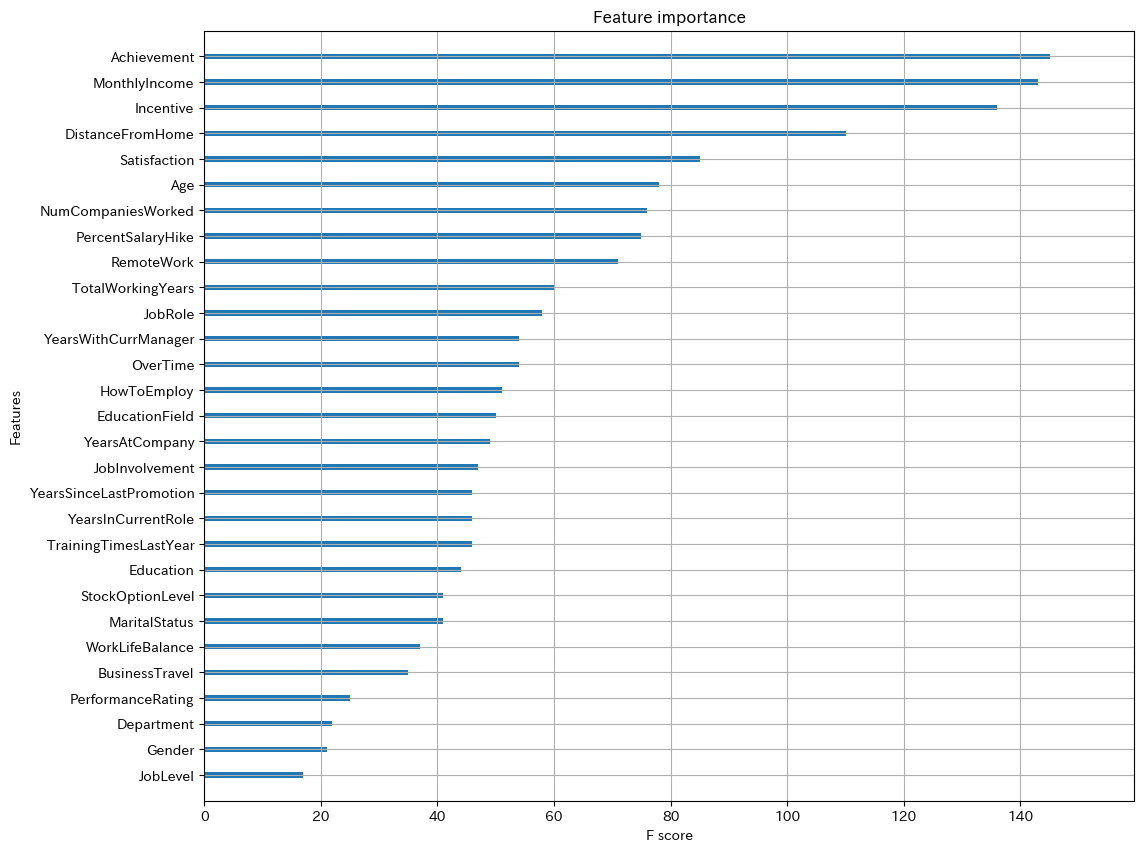

In [31]:
# 性能向上に寄与する度合いで重要度をプロットする
_, ax = plt.subplots(figsize=(12, 10))
xgb.plot_importance(xgb_,
                    ax=ax,
                    importance_type='weight',
                    show_values=False)
plt.show()

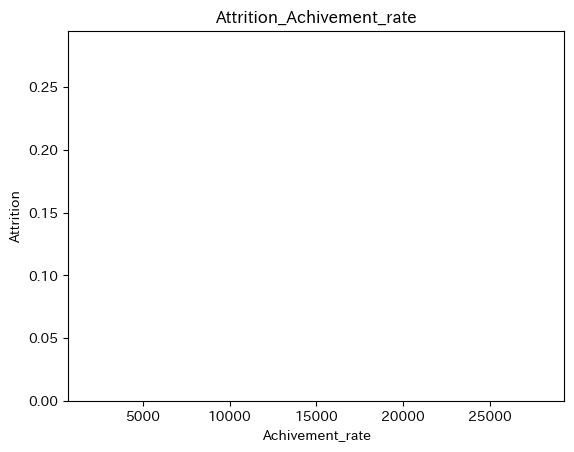

In [52]:
df2['Achievement'] = (df2['Achievement'] // 100)*100
achivement = df2.groupby('Achievement')
retirement_rate4 = achivement['Attrition'].mean()
plt.bar(retirement_rate4.index, retirement_rate4.values)
plt.xlabel('Achivement_rate')
plt.ylabel('Attrition')
plt.title('Attrition_Achivement_rate')
plt.show()

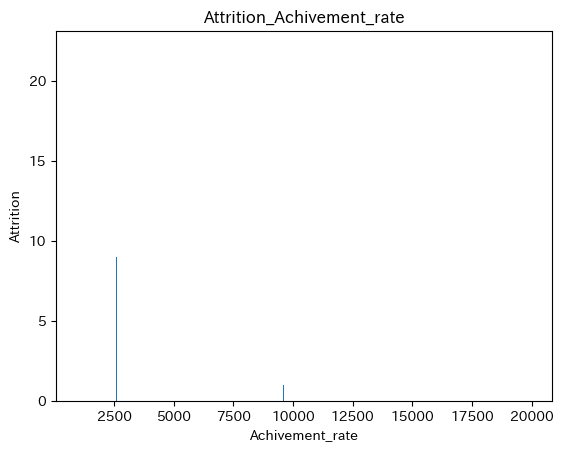

In [58]:
df2['MonthlyIncome'] = (df2['MonthlyIncome'] // 100)*100
achivement = df2.groupby('MonthlyIncome')
retirement_rate4 = achivement['Attrition'].sum()
plt.bar(retirement_rate4.index, retirement_rate4.values)
plt.xlabel('Achivement_rate')
plt.ylabel('Attrition')
plt.title('Attrition_Achivement_rate')
plt.show()

1   NumCompaniesWorked   0.069099635
2   StockOptionLevel   0.06582257
3   PerformanceRating   0.0573254
4   JobInvolvement   0.05082136
5   BusinessTravel   0.049555022
6   WorkLifeBalance   0.04471424
7   Department   0.03875861
8   PercentSalaryHike   0.03836534
9   HowToEmploy   0.0383211
10   Age_Group   0.03759076
11   MaritalStatus   0.0354137
12   MonthlyIncome   0.03266238
13   Incentive   0.032298036
14   YearsAtCompany   0.03198226
15   Attrition   0.031626444
16   TrainingTimesLastYear   0.029775927
17   Gender   0.027587242
18   Age   0.027340254
19   JobLevel   0.026532492
20   DistanceFromHome   0.026349042
21   EmployeeCount   0.026214648
22   JobRole   0.026148003
23   Satisfaction   0.025486425
24   OverTime   0.024586147
25   YearsInCurrentRole   0.02308123
26   YearsSinceLastPromotion   0.022671066
27   YearsWithCurrManager   0.020408822
28   Education   0.020134231
29   TotalWorkingYears   0.019327587
30   EducationField   0.0
31   RemoteWork   0.0


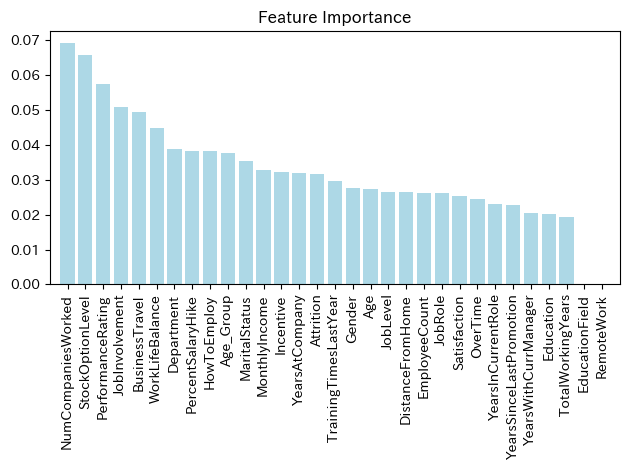

In [32]:
#特徴量の重要度
feature = xgb_.feature_importances_
#df3 = df2.drop('Attrition', axis=1)
#特徴量の名前
label = df2.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree = DecisionTreeClassifier()

# ハイパーパラメータの候補値を指定
param_grid = {
    'max_depth': [3, 4, 5],  # 深さの候補値
    'min_samples_split': [2, 5, 10],  # 分割に必要なサンプル数の候補値
    'min_samples_leaf': [1, 2, 4]  # 葉ノードに必要なサンプル数の候補値
}

# グリッドサーチを定義
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='roc_auc', cv=5)

# グリッドサーチを実行
grid_search.fit(x_train, y_train)

# 最適なハイパーパラメータを取得
best_params = grid_search.best_params_
print("最適なハイパーパラメータ:", best_params)

最適なハイパーパラメータ: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [34]:


clf_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1, min_samples_split = 2)
clf_model.fit(x_train, y_train)

dot_data = export_graphviz(clf_model)
graph = graphviz.Source(dot_data)
#graph.render('moon-tree', format='png')

# テストデータで予測確率を取得
y_pred_proba = clf_model.predict_proba(x_test)[:, 1]

# AUCスコアを計算
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUCスコア:", auc_score)

print('正解率(train):{:.3f}'.format(clf_model.score(x_train, y_train)))
print('正解率(test):{:.3f}'.format(clf_model.score(x_test, y_test)))

AUCスコア: 0.7592938909667913
正解率(train):0.867
正解率(test):0.874


1   StockOptionLevel   0.23518890330968634
2   MaritalStatus   0.19107131690869208
3   NumCompaniesWorked   0.15652881060281426
4   Department   0.13192979394352292
5   Age_Group   0.09254595882822217
6   Incentive   0.062334477841261934
7   PerformanceRating   0.05137438127121776
8   JobRole   0.035050566184099644
9   TrainingTimesLastYear   0.026724340566746305
10   TotalWorkingYears   0.017251450543736547
11   EmployeeCount   0.0
12   JobLevel   0.0
13   EducationField   0.0
14   Education   0.0
15   Gender   0.0
16   DistanceFromHome   0.0
17   BusinessTravel   0.0
18   JobInvolvement   0.0
19   Attrition   0.0
20   Satisfaction   0.0
21   OverTime   0.0
22   MonthlyIncome   0.0
23   PercentSalaryHike   0.0
24   WorkLifeBalance   0.0
25   YearsAtCompany   0.0
26   YearsInCurrentRole   0.0
27   YearsSinceLastPromotion   0.0
28   YearsWithCurrManager   0.0
29   HowToEmploy   0.0
30   RemoteWork   0.0
31   Age   0.0


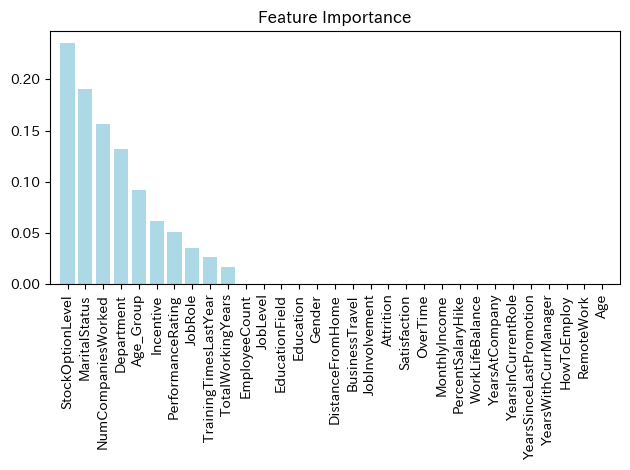

In [35]:
#特徴量の重要度
feature = clf_model.feature_importances_
#df3 = df2.drop('Attrition', axis=1)
#特徴量の名前
label = df2.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

2